In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data/iris-flower-dataset/IRIS.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.shape

(150, 5)

# Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2dbb2f198>,
      dtype=object)

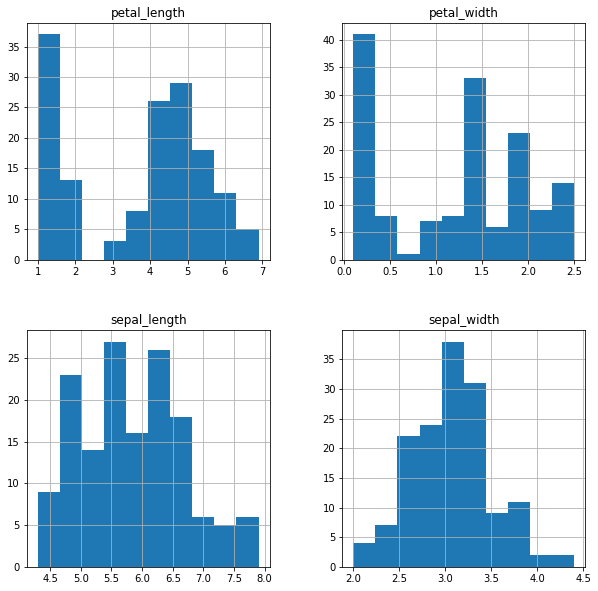

In [10]:
df.hist(figsize=(10,10))

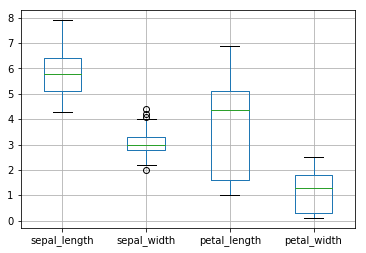

In [11]:
df.boxplot()

Text(0.5, 1.0, 'Scatter')

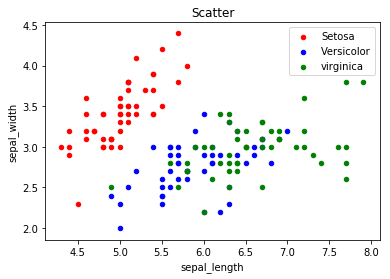

In [12]:
#ploating using pandas 

ax = df[df.species=='Iris-setosa'].plot.scatter(x='sepal_length',y='sepal_width',color='red',label = 'Setosa')

df[df.species=='Iris-versicolor'].plot.scatter(x='sepal_length',y='sepal_width',color = 'blue',label = 'Versicolor',ax=ax)

df[df.species=='Iris-virginica'].plot.scatter(x='sepal_length',y='sepal_width',color = 'green', label ='virginica',ax=ax)
ax.set_title("Scatter")

# Multivariate Analysis

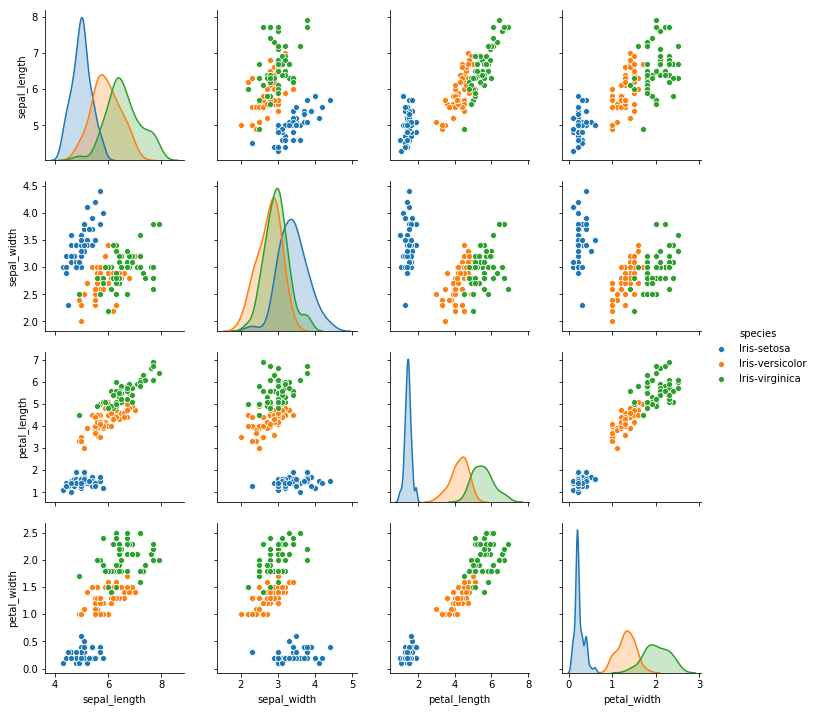

In [13]:
sns.pairplot(df,hue='species')

In [14]:
df.groupby(by='species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


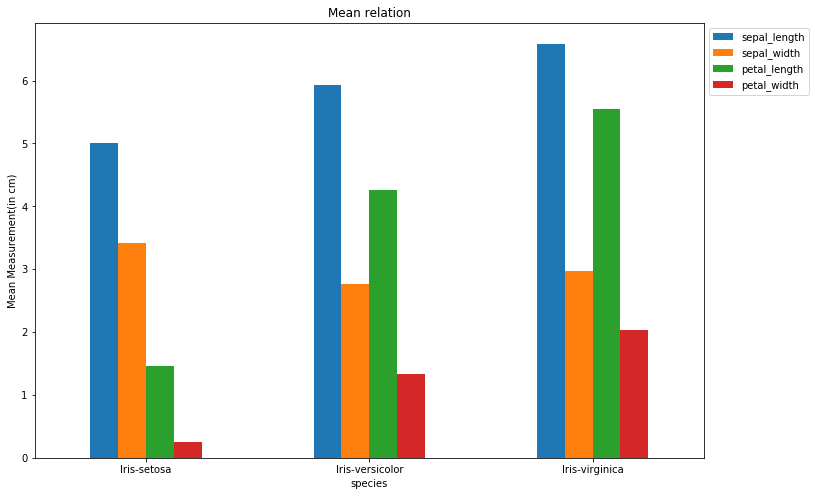

In [15]:
df.groupby(by='species').mean().plot(kind = 'bar',figsize =(12,8))
plt.title('Mean relation')
plt.ylabel('Mean Measurement(in cm)')
plt.xticks(rotation = 0)   #to make the x labels here species names horizontal from vertical

plt.legend(loc = 'upper left',bbox_to_anchor=(1,1))

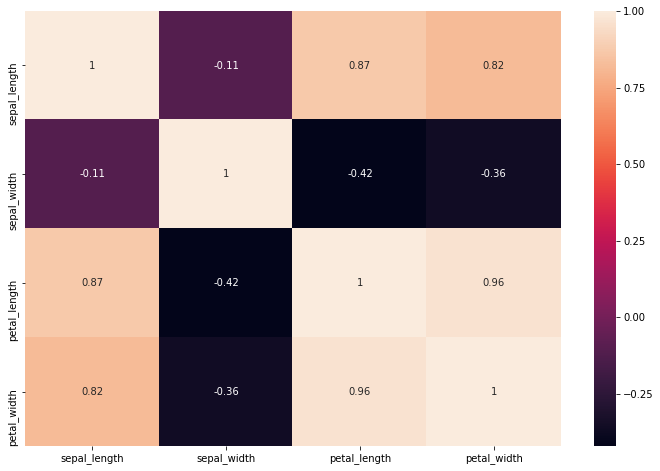

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True)


# Training model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('species',axis=1)
y = df['species']
print(X.head(),'\n')
print("target","\n",y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

target 
 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
knn.score(X_train,y_train)

0.9833333333333333

In [24]:
y_pred = knn.predict(X_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 12]])

In [26]:
# accuracy_score(y_test,y_pred)

In [27]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.86      1.00      0.92        12

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.93      0.94        30
   weighted avg       0.94      0.93      0.93        30

